### 20143567 Lee Hee Sang
# Load Minst train.csv and test.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

file_data = "mnist_train.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

test_file = "mnist_test.csv"
test_file_handle = open(test_file, "r")
test_data = test_file_handle.readlines()
test_file_handle.close()

size_row = 28    # height of the image
size_col = 28    # width of the image

num_image = len(data)
num_testimage = len(test_data)
count = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

    

#
# make a matrix each column of which represents an images in a vector form 
#




list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

    
    
count = 0 
list_test_image = np.empty((size_row * size_col, num_testimage), dtype=float)
list_test_label = np.empty(num_testimage, dtype=int)

for line in test_data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_test_label[count]       = label
    list_test_image[:, count]    = im_vector    

    count += 1

    

    




# Apply K-means clustering to MNIST training dataset with different K = 5 
# Visualize 5 centroid images for each category.
# Plot the training energy per optimization iteration.
# Plot the training accuracy per optimization iteration.
# Plot the testing accuracy per optimization iteration.

0.36232150910419325 0.40110163901865425
0.4020133392551212 0.42090551234349005
0.42102825935192145 0.44184693939290953
0.4330915504431143 0.4569972619706619
0.4513691967001255 0.474280726260666
0.4688118471366175 0.48678463713068504
0.4833192671980412 0.49524851869632336
0.4933047989379908 0.5046258214506996
0.4995310504615664 0.5100232110409886
0.5040085932182736 0.5121397958920799
0.5074192375480989 0.5147874686169408
0.5106015683698062 0.5174314135773456
0.5122049218139373 0.5182928527857787
0.5139175319741093 0.5188644032798395
0.515155274537294 0.5190976745776202
0.5157193364743367 0.519549306194229
0.5161925093239147 0.5202996295151242
0.5163427427212456 0.5209190396158111
0.5164659268125925 0.5203752110621649
0.5165697292025505 0.5201794118171426
0.5165067836837387 0.5205160939616139
0.5164954410103352 0.5204476758051949
0.5164318396823566 0.5204608510483467
0.5162859334013632 0.5205188924323414
0.5161570616945067 0.5203950501584351
0.5161050693260688 0.5202471915212152
0.516097

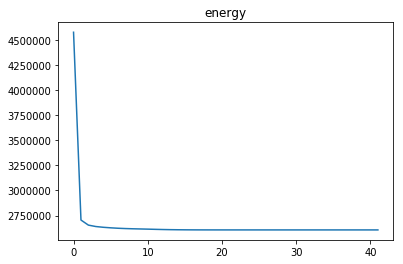

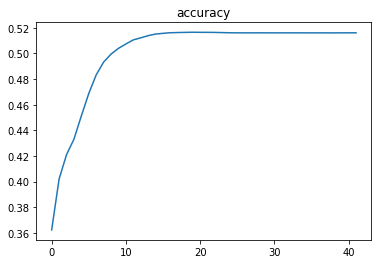

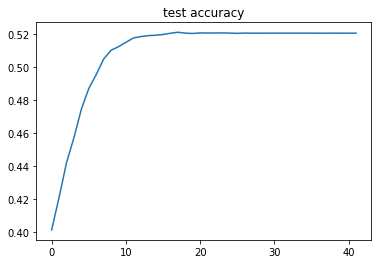

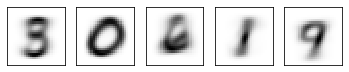

In [2]:
#
#Set start centroid
#

num_of_cluster = 5

k_mean_image=np.empty((size_row * size_col, num_of_cluster), dtype=float)
k_mean_label=np.empty(num_image, dtype=int)

for i in range(num_of_cluster):
    image=list_image[:, i]
    label=list_label[i]
    k_mean_image[:,i] = image
    k_mean_label[i] = label


newlabel = np.empty(num_image, dtype=int)
energy_list=[]
accuracy_list=[]
test_accuracy_list=[]

# set label and calculate energy function,accuracy

while True:
    
    #
    #calculate energy,set label
    #
    
    energy = 0
    for num in range(num_image):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((k_mean_image[:, i] - list_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        newlabel[num] = cen.index(min(cen))
        energy = energy + min(cen)
    
    
    energy_list.append(energy)
    
    #
    #calculate accuracy
    #
    
    cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        new_counter=np.zeros(10, dtype=int)
        for i in range(num_image):
            if newlabel[i]==k:
                answer = list_label[i]
                new_counter[answer] = new_counter[answer]+1
        key = np.argmax(new_counter)
        cluster_accuracy[k] = np.float64(new_counter[key])/np.sum(new_counter)
        
    accuracy = np.sum(cluster_accuracy)/num_of_cluster
   
    accuracy_list.append(accuracy)
    
    #
    # average image
    #
    
    new_sum=np.zeros((size_row * size_col, num_of_cluster), dtype=float)
    counter=np.zeros(num_of_cluster, dtype=int)
    count=0
    
    for k in range(num_of_cluster):
        for i in range(num_image):
            if newlabel[i]==k:
                counter[k]+=1
                new_sum[:,k]+=list_image[:,i]
    for j in range(size_row * size_col):
        for k in range(num_of_cluster):
            new_sum[j,k]= new_sum[j,k]/counter[k]
    
    
    #
    # test accuracy
    #
    test_newlabel = np.empty(num_testimage, dtype=int)
    
    for num in range(num_testimage):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((new_sum[:, i] - list_test_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        test_newlabel[num] = cen.index(min(cen))
        
    test_cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        test_new_counter=np.zeros(10, dtype=int)
        for i in range(num_testimage):
            if test_newlabel[i]==k:
                answer = list_test_label[i]
                test_new_counter[answer] = test_new_counter[answer]+1
        key = np.argmax(test_new_counter)
        test_cluster_accuracy[k] = np.float64(test_new_counter[key])/np.sum(test_new_counter)
        
    test_accuracy = np.sum(test_cluster_accuracy)/num_of_cluster
    print(accuracy,test_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    
    
    if np.array_equal(k_mean_image,new_sum):
        k_mean_image=new_sum.copy()
        break
    else:
        k_mean_image=new_sum.copy()
    
    

plt.figure(1)
plt.title("energy")
plt.plot(energy_list)
plt.show()

plt.figure(2)
plt.title("accuracy")
plt.plot(accuracy_list)
plt.show()

plt.figure(3)
plt.title("test accuracy")
plt.plot(test_accuracy_list)
plt.show()            
        


f1 = plt.figure(4)

for i in range(num_of_cluster):

    
    im_vector   = k_mean_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, num_of_cluster, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



plt.show()


# Apply K-means clustering to MNIST training dataset with different K = 10  
# Visualize 10 centroid images for each category.
# Plot the training energy per optimization iteration.
# Plot the training accuracy per optimization iteration.
# Plot the testing accuracy per optimization iteration.

0.4390524196752511 0.4687773735479204
0.47305215299120934 0.4901981749989985
0.4951413356188558 0.5128636322703021
0.5137194559710372 0.5384261100029006
0.5376236134266388 0.5684633648002837
0.5641637734408793 0.5952348127547025
0.5875897746557152 0.6118168506638761
0.6024347395221422 0.6172443573683551
0.6110289124287076 0.6200682445973105
0.6155266117578794 0.6222302067010665
0.6167490329326148 0.6231211268954704
0.6173988322196732 0.6233381367727369
0.6170303600269791 0.6214796468160636
0.6161774063008193 0.6195067617825236
0.6155792483938827 0.6190649081867796
0.6145980053929779 0.6179753927392035
0.6136902889313534 0.6175086866389734
0.6131748986710268 0.6169233927727642
0.6122879208540519 0.6162220232281678
0.6118503199872524 0.6153946104719822
0.6111109479066372 0.6148900443075674
0.6106708734957651 0.6146740856018684
0.6101907326114122 0.6139565008449457
0.6098338139897859 0.613768046523391
0.6095551076026406 0.6135398146620259
0.6089044838313351 0.6130290702122716
0.6084784029

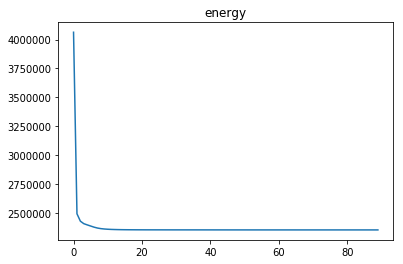

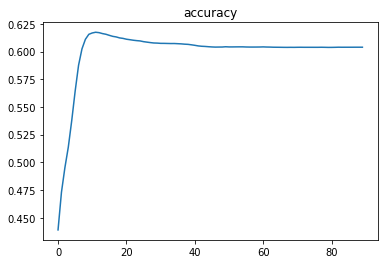

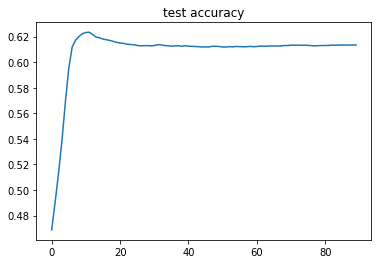

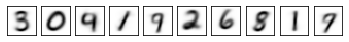

In [3]:
#
#Set start centroid
#

num_of_cluster = 10

k_mean_image=np.empty((size_row * size_col, num_of_cluster), dtype=float)
k_mean_label=np.empty(num_image, dtype=int)

for i in range(num_of_cluster):
    image=list_image[:, i]
    label=list_label[i]
    k_mean_image[:,i] = image
    k_mean_label[i] = label


newlabel = np.empty(num_image, dtype=int)
energy_list=[]
accuracy_list=[]
test_accuracy_list=[]

# set label and calculate energy function,accuracy

while True:
    
    #
    #calculate energy,set label
    #
    
    energy = 0
    for num in range(num_image):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((k_mean_image[:, i] - list_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        newlabel[num] = cen.index(min(cen))
        energy = energy + min(cen)
    
    
    energy_list.append(energy)
    
    #
    #calculate accuracy
    #
    
    cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        new_counter=np.zeros(10, dtype=int)
        for i in range(num_image):
            if newlabel[i]==k:
                answer = list_label[i]
                new_counter[answer] = new_counter[answer]+1
        key = np.argmax(new_counter)
        cluster_accuracy[k] = np.float64(new_counter[key])/np.sum(new_counter)
        
    accuracy = np.sum(cluster_accuracy)/num_of_cluster
    
    accuracy_list.append(accuracy)
    
    #
    # average image
    #
    
    new_sum=np.zeros((size_row * size_col, num_of_cluster), dtype=float)
    counter=np.zeros(num_of_cluster, dtype=int)
    count=0
    
    for k in range(num_of_cluster):
        for i in range(num_image):
            if newlabel[i]==k:
                counter[k]+=1
                new_sum[:,k]+=list_image[:,i]
    for j in range(size_row * size_col):
        for k in range(num_of_cluster):
            new_sum[j,k]= new_sum[j,k]/counter[k]
    
    
    #
    # test accuracy
    #
    test_newlabel = np.empty(num_testimage, dtype=int)
    
    for num in range(num_testimage):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((new_sum[:, i] - list_test_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        test_newlabel[num] = cen.index(min(cen))
        
    test_cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        test_new_counter=np.zeros(10, dtype=int)
        for i in range(num_testimage):
            if test_newlabel[i]==k:
                answer = list_test_label[i]
                test_new_counter[answer] = test_new_counter[answer]+1
        key = np.argmax(test_new_counter)
        test_cluster_accuracy[k] = np.float64(test_new_counter[key])/np.sum(test_new_counter)
        
    test_accuracy = np.sum(test_cluster_accuracy)/num_of_cluster
    print(accuracy,test_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    
    
    if np.array_equal(k_mean_image,new_sum):
        k_mean_image=new_sum.copy()
        break
    else:
        k_mean_image=new_sum.copy()
    
    

plt.figure(1)
plt.title("energy")
plt.plot(energy_list)
plt.show()

plt.figure(2)
plt.title("accuracy")
plt.plot(accuracy_list)
plt.show()

plt.figure(3)
plt.title("test accuracy")
plt.plot(test_accuracy_list)
plt.show()            
        


f1 = plt.figure(4)

for i in range(num_of_cluster):

    
    im_vector   = k_mean_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, num_of_cluster, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



plt.show()


# Apply K-means clustering to MNIST training dataset with different K = 15 and 
# Visualize 1K centroid images for each category.
# Plot the training energy per optimization iteration.
# Plot the training accuracy per optimization iteration.
# Plot the testing accuracy per optimization iteration.

0.5142485447742998 0.5854768954243188
0.5743411996135822 0.6040678229838097
0.596804685659698 0.6108160828736128
0.6088188102139795 0.6178287594163219
0.616967764819368 0.6217367630484046
0.6225503418409424 0.6237588251444496
0.6266056597223881 0.6259648722290396
0.6289007899676066 0.6289105458619932
0.6313272890341216 0.6312777715578279
0.6325725209639008 0.6302657046087118
0.6327596549625245 0.6309505972319633
0.6338404551338085 0.630974099530965
0.6348840086465148 0.6316485381927986
0.6356558154472404 0.6313598165252923
0.6369891812091043 0.6306862654809272
0.6377601769141875 0.6301849718630217
0.638330724604034 0.6308054195856969
0.6385945911258278 0.6311187396721204
0.6385067428194235 0.6301037789963143
0.6380051711263002 0.6328952141822517
0.6406475464072791 0.6367698390421912
0.6439051275751602 0.6401304702113285
0.6471704642538566 0.6425619355707736
0.6506056711958055 0.6453463979104098
0.653586229672985 0.6479723745254448
0.6567350377594597 0.6498387583473973
0.659416751501811

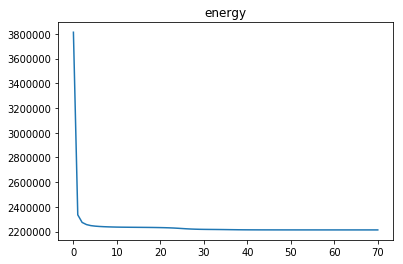

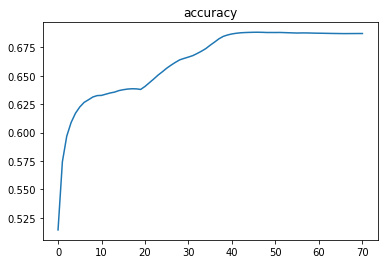

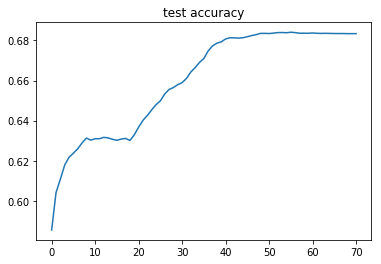

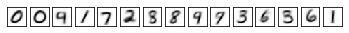

In [4]:
#
#Set start centroid
#

num_of_cluster = 15

k_mean_image=np.empty((size_row * size_col, num_of_cluster), dtype=float)
k_mean_label=np.empty(num_image, dtype=int)

for i in range(num_of_cluster):
    image=list_image[:, i]
    label=list_label[i]
    k_mean_image[:,i] = image
    k_mean_label[i] = label


newlabel = np.empty(num_image, dtype=int)
energy_list=[]
accuracy_list=[]
test_accuracy_list=[]

# set label and calculate energy function,accuracy

while True:
    
    #
    #calculate energy,set label
    #
    
    energy = 0
    for num in range(num_image):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((k_mean_image[:, i] - list_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        newlabel[num] = cen.index(min(cen))
        energy = energy + min(cen)
    
    
    energy_list.append(energy)
    
    #
    #calculate accuracy
    #
    
    cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        new_counter=np.zeros(10, dtype=int)
        for i in range(num_image):
            if newlabel[i]==k:
                answer = list_label[i]
                new_counter[answer] = new_counter[answer]+1
        key = np.argmax(new_counter)
        cluster_accuracy[k] = np.float64(new_counter[key])/np.sum(new_counter)
        
    accuracy = np.sum(cluster_accuracy)/num_of_cluster
    
    accuracy_list.append(accuracy)
    
    #
    # average image
    #
    
    new_sum=np.zeros((size_row * size_col, num_of_cluster), dtype=float)
    counter=np.zeros(num_of_cluster, dtype=int)
    count=0
    
    for k in range(num_of_cluster):
        for i in range(num_image):
            if newlabel[i]==k:
                counter[k]+=1
                new_sum[:,k]+=list_image[:,i]
    for j in range(size_row * size_col):
        for k in range(num_of_cluster):
            new_sum[j,k]= new_sum[j,k]/counter[k]
    
    
    #
    # test accuracy
    #
    test_newlabel = np.empty(num_testimage, dtype=int)
    
    for num in range(num_testimage):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((new_sum[:, i] - list_test_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        test_newlabel[num] = cen.index(min(cen))
        
    test_cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        test_new_counter=np.zeros(10, dtype=int)
        for i in range(num_testimage):
            if test_newlabel[i]==k:
                answer = list_test_label[i]
                test_new_counter[answer] = test_new_counter[answer]+1
        key = np.argmax(test_new_counter)
        test_cluster_accuracy[k] = np.float64(test_new_counter[key])/np.sum(test_new_counter)
        
    test_accuracy = np.sum(test_cluster_accuracy)/num_of_cluster
    print(accuracy,test_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    
    
    if np.array_equal(k_mean_image,new_sum):
        k_mean_image=new_sum.copy()
        break
    else:
        k_mean_image=new_sum.copy()
    
    

plt.figure(1)
plt.title("energy")
plt.plot(energy_list)
plt.show()

plt.figure(2)
plt.title("accuracy")
plt.plot(accuracy_list)
plt.show()

plt.figure(3)
plt.title("test accuracy")
plt.plot(test_accuracy_list)
plt.show()            
        


f1 = plt.figure(4)

for i in range(num_of_cluster):

    
    im_vector   = k_mean_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, num_of_cluster, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



plt.show()


# Apply K-means clustering to MNIST training dataset with different K = 20 
# Visualize 20 centroid images for each category.
# Plot the training energy per optimization iteration.
# Plot the training accuracy per optimization iteration.
# Plot the testing accuracy per optimization iteration.

0.5956406246443879 0.6417825050266865
0.6465577521491301 0.6632318783868609
0.665801453601148 0.6808553138327041
0.6806581629177274 0.6927082489795667
0.6909193798828758 0.6974993266574194
0.6956636233467879 0.7006173106110696
0.6981669374212618 0.7034253734098952
0.6995297403996584 0.7059610865380732
0.703106780405546 0.7096861844233183
0.7068469999671884 0.7142377052528431
0.7094439993786132 0.7138458322117553
0.7114072218169017 0.713725088501471
0.7126990849540937 0.7139164486705094
0.7136793678133 0.7165632506144952
0.7137873983049109 0.7183099826955337
0.7133370080735446 0.7206761962087846
0.7150304013405939 0.7221338864895832
0.7170795497020926 0.7233810041193371
0.7195854546833444 0.7253068624617482
0.7228929776183924 0.7281211551637393
0.7273114497644603 0.7337407395512022
0.7326330744434353 0.7386097453095546
0.7380840791187013 0.743279877289233
0.7426146982725131 0.7477165982244605
0.745411167371109 0.7490422821888768
0.7464399160502874 0.7496415088422398
0.7472817962860081 0

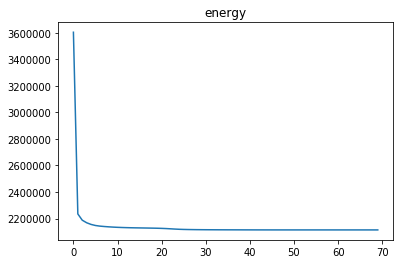

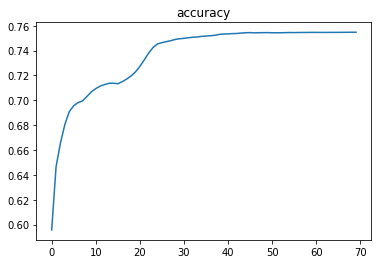

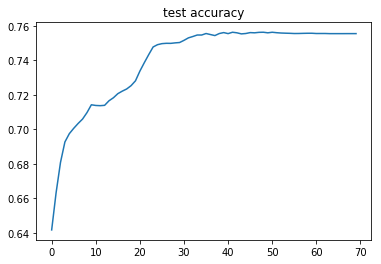

In [5]:
#
#Set start centroid
#

num_of_cluster = 20

k_mean_image=np.empty((size_row * size_col, num_of_cluster), dtype=float)
k_mean_label=np.empty(num_image, dtype=int)

for i in range(num_of_cluster):
    image=list_image[:, i]
    label=list_label[i]
    k_mean_image[:,i] = image
    k_mean_label[i] = label


newlabel = np.empty(num_image, dtype=int)
energy_list=[]
accuracy_list=[]
test_accuracy_list=[]

# set label and calculate energy function,accuracy

while True:
    
    #
    #calculate energy,set label
    #
    
    energy = 0
    for num in range(num_image):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((k_mean_image[:, i] - list_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        newlabel[num] = cen.index(min(cen))
        energy = energy + min(cen)
    
    
    energy_list.append(energy)
    
    #
    #calculate accuracy
    #
    
    cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        new_counter=np.zeros(10, dtype=int)
        for i in range(num_image):
            if newlabel[i]==k:
                answer = list_label[i]
                new_counter[answer] = new_counter[answer]+1
        key = np.argmax(new_counter)
        cluster_accuracy[k] = np.float64(new_counter[key])/np.sum(new_counter)
        
    accuracy = np.sum(cluster_accuracy)/num_of_cluster
    
    accuracy_list.append(accuracy)
    
    #
    # average image
    #
    
    new_sum=np.zeros((size_row * size_col, num_of_cluster), dtype=float)
    counter=np.zeros(num_of_cluster, dtype=int)
    count=0
    
    for k in range(num_of_cluster):
        for i in range(num_image):
            if newlabel[i]==k:
                counter[k]+=1
                new_sum[:,k]+=list_image[:,i]
    for j in range(size_row * size_col):
        for k in range(num_of_cluster):
            new_sum[j,k]= new_sum[j,k]/counter[k]
    
    
    #
    # test accuracy
    #
    test_newlabel = np.empty(num_testimage, dtype=int)
    
    for num in range(num_testimage):
        cen = []   
        
        for i in range(num_of_cluster):
            sum = 0
            sum += ((new_sum[:, i] - list_test_image[:, num]) ** 2)
            cen.append(np.sum(sum))
        
        test_newlabel[num] = cen.index(min(cen))
        
    test_cluster_accuracy = np.empty(num_of_cluster, dtype=float)
    
    for k in range(num_of_cluster):
        test_new_counter=np.zeros(10, dtype=int)
        for i in range(num_testimage):
            if test_newlabel[i]==k:
                answer = list_test_label[i]
                test_new_counter[answer] = test_new_counter[answer]+1
        key = np.argmax(test_new_counter)
        test_cluster_accuracy[k] = np.float64(test_new_counter[key])/np.sum(test_new_counter)
        
    test_accuracy = np.sum(test_cluster_accuracy)/num_of_cluster
    print(accuracy,test_accuracy)
    test_accuracy_list.append(test_accuracy)
    
    
    
    if np.array_equal(k_mean_image,new_sum):
        k_mean_image=new_sum.copy()
        break
    else:
        k_mean_image=new_sum.copy()
    
    

plt.figure(1)
plt.title("energy")
plt.plot(energy_list)
plt.show()

plt.figure(2)
plt.title("accuracy")
plt.plot(accuracy_list)
plt.show()

plt.figure(3)
plt.title("test accuracy")
plt.plot(test_accuracy_list)
plt.show()            
        


f1 = plt.figure(4)

for i in range(num_of_cluster):

    
    im_vector   = k_mean_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, num_of_cluster, i+1)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



plt.show()
